In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_curve, auc

# Generate synthetic data
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
def train_and_evaluate(max_depth=10):
    clf = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    clf.fit(X_train, y_train)
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)

    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)

    train_recall = recall_score(y_train, y_pred_train)
    test_recall = recall_score(y_test, y_pred_test)

    return train_accuracy, test_accuracy, train_recall, test_recall, clf


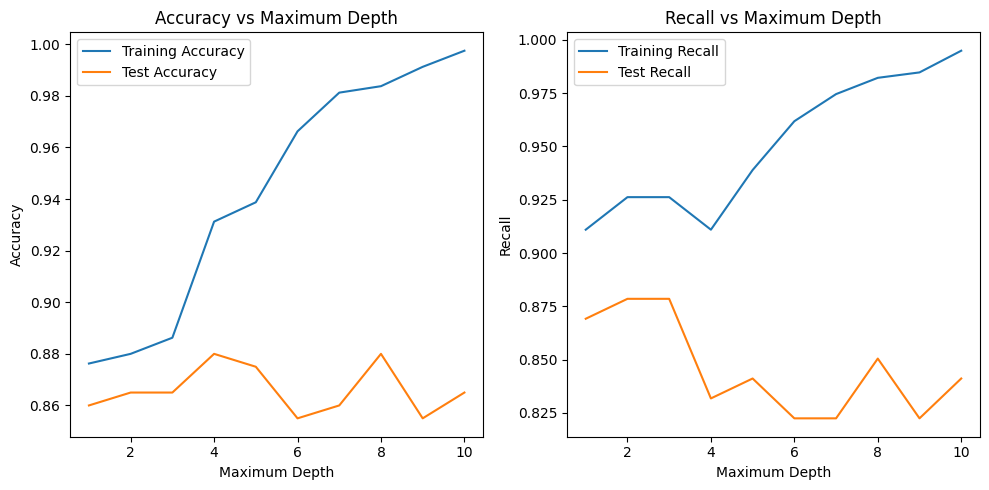

In [26]:
max_depths = []
train_accuracies = []
test_accuracies = []
train_recalls = []
test_recalls = []
classifiers = []
for i in range(1, 11):
    train_accuracy, test_accuracy, train_recall, test_recall, clf = train_and_evaluate(max_depth=i)
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
    train_recalls.append(train_recall)
    test_recalls.append(test_recall)
    max_depths.append(i)
    classifiers.append(clf)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(max_depths, train_accuracies, label='Training Accuracy')
plt.plot(max_depths, test_accuracies, label='Test Accuracy')
plt.xlabel('Maximum Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Maximum Depth')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(max_depths, train_recalls, label='Training Recall')
plt.plot(max_depths, test_recalls, label='Test Recall')
plt.xlabel('Maximum Depth')
plt.ylabel('Recall')
plt.title('Recall vs Maximum Depth')
plt.legend()

plt.tight_layout()
plt.savefig("accuracy_recall_plot.webp")
plt.show()




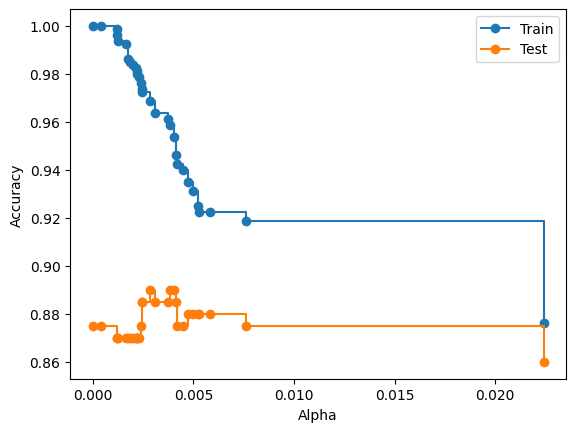

In [35]:
pruned_train_accuracies = []
pruned_test_accuracies = []
pruned_train_recalls = []
pruned_test_recalls = []

pruned_classifiers = []

train_accuracy, test_accuracy, train_recall, test_recall, clf = train_and_evaluate(10)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
pruned_clfs = []

for ccp_alpha in ccp_alphas:
        pruned_clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
        pruned_clf.fit(X_train, y_train)
        pruned_clfs.append(pruned_clf)

train_accuracies = [accuracy_score(y_train, clf.predict(X_train)) for clf in pruned_clfs]
test_accuracies = [accuracy_score(y_test, clf.predict(X_test)) for clf in pruned_clfs]

fig, ax = plt.subplots()
ax.set_xlabel("Alpha")
ax.set_ylabel("Accuracy")
ax.plot(ccp_alphas[:-1], train_accuracies[:-1], marker='o', label='Train', drawstyle="steps-post")
ax.plot(ccp_alphas[:-1], test_accuracies[:-1], marker='o', label='Test', drawstyle="steps-post")
ax.legend()
plt.show()


Best alpha: 0.007595980126467922
Best accuracy: 0.8975


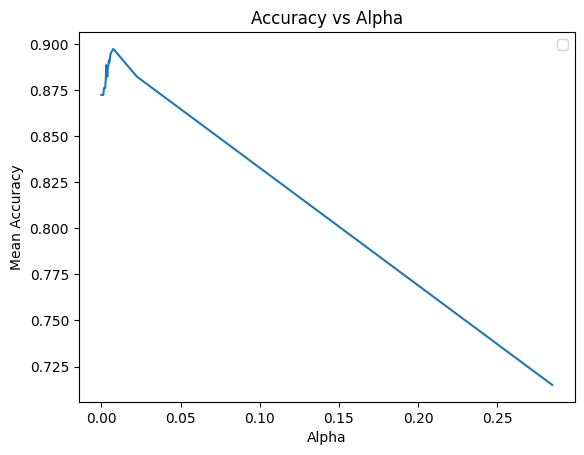

In [44]:
from sklearn.model_selection import cross_val_score # import the missing function
scores_cv = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    scores = cross_val_score(clf, X_train, y_train, cv=5)
    scores_cv.append(scores.mean())

plt.plot(ccp_alphas, scores_cv)
plt.xlabel('Alpha')
plt.ylabel('Mean Accuracy')
plt.title('Accuracy vs Alpha')
plt.legend()

best_idx = np.argmax(scores_cv)
print(f"Best alpha: {ccp_alphas[best_idx]}")
print(f"Best accuracy: {scores_cv[best_idx]}")


In [27]:
pruned_train_accuracies = []
pruned_test_accuracies = []
pruned_train_recalls = []
pruned_test_recalls = []

pruned_classifiers = []

for clf in classifiers:
    path = clf.cost_complexity_pruning_path(X_train, y_train)
    ccp_alphas, impurities = path.ccp_alphas, path.impurities

    pruned_clfs = []

    for ccp_alpha in ccp_alphas:
        pruned_clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
        pruned_clf.fit(X_train, y_train)
        pruned_clfs.append(pruned_clf)

    train_accuracies = [accuracy_score(y_train, clf.predict(X_train)) for clf in pruned_clfs]
    test_accuracies = [accuracy_score(y_test, clf.predict(X_test)) for clf in pruned_clfs]
    train_recalls = [recall_score(y_train, clf.predict(X_train)) for clf in pruned_clfs]
    test_recalls = [recall_score(y_test, clf.predict(X_test)) for clf in pruned_clfs]

    best_idx = np.argmax(test_accuracies)

    pruned_train_accuracies.append(train_accuracies[best_idx])
    pruned_test_accuracies.append(test_accuracies[best_idx])
    pruned_train_recalls.append(train_recalls[best_idx])
    pruned_test_recalls.append(test_recalls[best_idx])

    pruned_classifiers.append(pruned_clfs[best_idx])


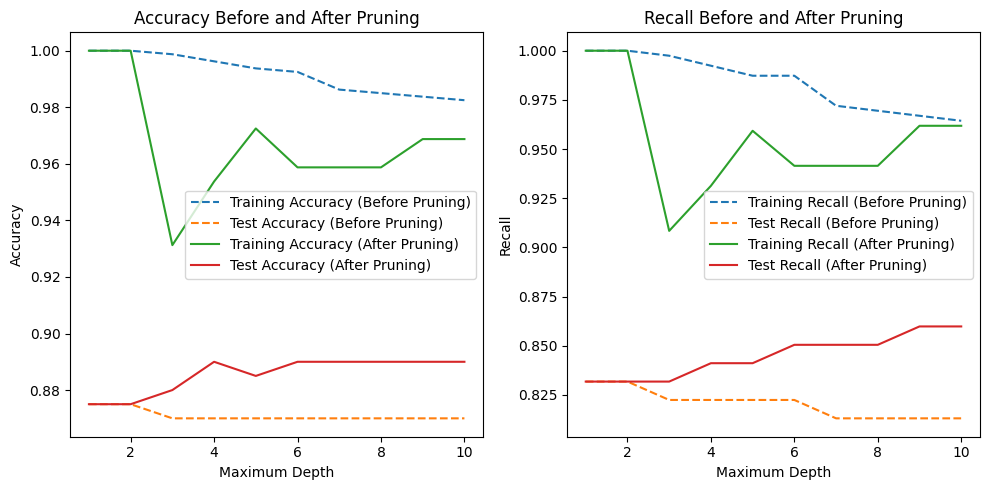

In [28]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(max_depths, train_accuracies[0:len(max_depths)], '--', label='Training Accuracy (Before Pruning)')
plt.plot(max_depths, test_accuracies[0:len(max_depths)], '--', label='Test Accuracy (Before Pruning)')
plt.plot(max_depths, pruned_train_accuracies, label='Training Accuracy (After Pruning)')
plt.plot(max_depths, pruned_test_accuracies, label='Test Accuracy (After Pruning)')
plt.xlabel('Maximum Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy Before and After Pruning')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(max_depths, train_recalls[0:len(max_depths)], '--', label='Training Recall (Before Pruning)')
plt.plot(max_depths, test_recalls[0:len(max_depths)], '--', label='Test Recall (Before Pruning)')
plt.plot(max_depths, pruned_train_recalls, label='Training Recall (After Pruning)')
plt.plot(max_depths, pruned_test_recalls, label='Test Recall (After Pruning)')
plt.xlabel('Maximum Depth')
plt.ylabel('Recall')
plt.title('Recall Before and After Pruning')
plt.legend()

plt.tight_layout()
plt.savefig("accuracy_recall_before_after_pruning_plot.webp")
plt.show()
